<a href="https://colab.research.google.com/github/nixonleonard/NaiveBayes-Model-Study/blob/main/NaiveBayes_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix,accuracy_score

**Read Datasets**

In [ ]:
data = pd.read_csv('sample_data/naivebayes_datasets_admitted.csv')
data.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**Correlation Matrix**

disini memiliki korelasi yang cukup baik jadi tidak perlu membuang variabel apapun

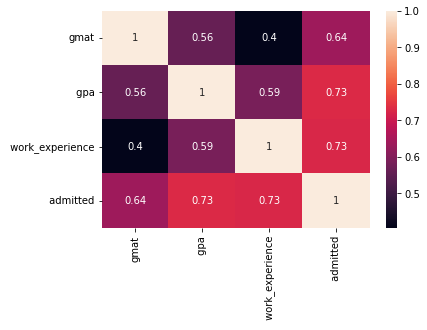

In [ ]:
sns.heatmap(data.corr(), annot = True)

**Function modeling naive bayes**

In [ ]:
def prior_calculation_prob(data, y):
    classes = sorted(list(data[y].unique()))
    prior = []
    for i in classes:
        prior.append(len(data[data[y]==i])/len(data))
    return prior

def likelihood_gaussian_calculation(data, ftname, ftval, y, label):
    ft = list(data.columns)
    data = (data[data[y]==label])
    mean = data[ftname].mean()
    stdev = data[ftname].std()
    probX_Y = (1 / (np.sqrt(2 * np.pi) * stdev)) * np.exp(-((ftval - mean) ** 2 / (2 * stdev**2 )))
    return probX_Y

def naive_bayes_gaussian(data, X, y):
    ft = list(data.columns)[:-1]  #mendapatkan nama fitur
    prior = prior_calculation_prob(data,y)   #menghitung prior
    y_pred = []

    for i in X:  #looping setiap sampel data
        label = sorted(list(data[y].unique()))
        likelihood = [1]*len(label)
        for j in range(len(label)):
            for k in range(len(ft)):  #menghitung likelihood
                likelihood[j] *= likelihood_gaussian_calculation(data, ft[k], i[k], y, label[j])

    #menghitung prosterior prob
        probPosterior = [1]*len(label)
        for j in range(len(label)):
            probPosterior[j] = likelihood[j] * prior[j]
        
        y_pred.append(np.argmax(probPosterior))

    return np.array(y_pred)


**Train data (75%) dan Test data (25%) yang ada**

In [ ]:
train, test = train_test_split(data, test_size = 0.25, random_state = 42)

X_test = test.iloc[:,[0,1,2]].values
y_test = test.iloc[:,-1].values

y_pred = naive_bayes_gaussian(data, X = X_test, y = ' admitted')

checkData = pd.DataFrame({
    'Ground Truth': y_test,
    'Prediction': y_pred
})

checkData

**Confusion Matix**

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

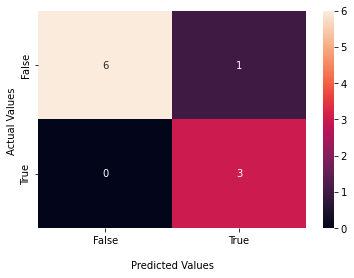

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
table_cfm = sns.heatmap(conf_matrix, annot = True)
table_cfm.set_xlabel('\nPredicted Values')
table_cfm.set_ylabel('Actual Values ')

table_cfm.xaxis.set_ticklabels(['False','True'])
table_cfm.yaxis.set_ticklabels(['False','True'])

**Data Test**

In [ ]:
gmat = np.array([590, 740, 680, 610, 710])
gpa = np.array([2, 3.7, 3.3, 2.3, 3])
work_experience = np.array([3, 4, 6, 1, 5])

df_test = pd.DataFrame({
    'gmat':gmat,
    'gpa':gpa,
    'work_experience' : work_experience
})

test_X = df_test.values
predictY_testX = naive_bayes_gaussian(data, X = test_X, y ='admitted')
final_predict = df_test.assign(admitted = predictY_testX)
final_predict

,gmat,gpa,work_experience,admitted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1
